# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import callbacks  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, LSTM, Dropout  # type: ignore

2024-11-02 14:34:28.065841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 14:34:28.088749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 14:34:28.094582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 14:34:28.107858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values
last_index = len(training_set)

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []

for i in range(60, last_index):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(
    X_train, (X_train.shape[0], X_train.shape[1], 1)
)  # number of lines (number of stock prices) / number of steps / how many indicator

## Part 2 - Building and Training the RNN

### Custom callback to print device information after each epoch

In [6]:
class DeviceCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Checking the device details
        devices = tf.config.list_logical_devices("GPU")
        if devices:
            device_name = devices[0].name
            print(f"Epoch {epoch + 1} finished using: {device_name} (GPU)")
        else:
            print(f"Epoch {epoch + 1} finished using: CPU")

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

I0000 00:00:1730550870.437064   30709 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730550870.443272   30709 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730550870.443331   30709 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730550870.446117   30709 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730550870.446161   30709 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[DeviceCallback()])

Epoch 1/100


2024-11-02 14:34:34.527977: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0928Epoch 1 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0886
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0068Epoch 2 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0068
Epoch 3/100
26/38 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - loss: 0.0052Epoch 3 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0053 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0051Epoch 4 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0051
Epoch 5/100
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0054Epoch 5 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0047Epoch 6 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0047
Epoch 7/100
36/38 ━━

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [16]:
dataset_total = pd.concat(
    (dataset_train["Open"], dataset_test["Open"]), axis=0
)  # vertical concatination for rows
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


### Visualising the results

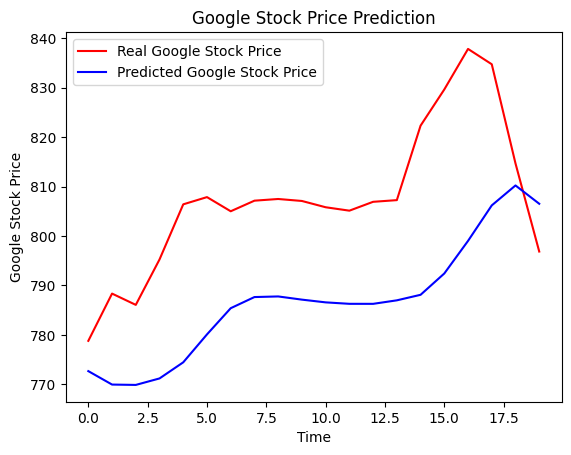

In [17]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()